In [1]:
library(tidyverse)
#loading the libraries needed for data wrangling

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players_url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
sessions_url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"

players_data <- read_csv(players_url)

sample_players_data <- players_data |>
head()
sample_players_data

sessions_data <- read_csv(sessions_url)

sample_players_data <- sessions_data |>
head()
sample_players_data

#Reading in raw dataset (not yet manipulated), displaying first few rows of respective datasets

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [3]:
cleaned_players <- players_data |>
select(experience, played_hours, name, age, gender)

sample_cleaned <- cleaned_players |>
head()

sample_cleaned
#Filtered data in accordance with variables to be explored, ignored individualID and organizationName as both variables contained all NULL values, displays first few rows of respective tibble

experience,played_hours,name,age,gender
<chr>,<dbl>,<chr>,<dbl>,<chr>
Pro,30.3,Morgan,9,Male
Veteran,3.8,Christian,17,Male
Veteran,0.0,Blake,17,Male
Amateur,0.7,Flora,21,Female
Regular,0.1,Kylie,21,Male
Amateur,0.0,Adrian,17,Female


experience,total_played_hours
<fct>,<dbl>
Veteran,0.6479167
Pro,2.6000000
Regular,18.2083333
Amateur,6.0174603
Beginner,1.2485714


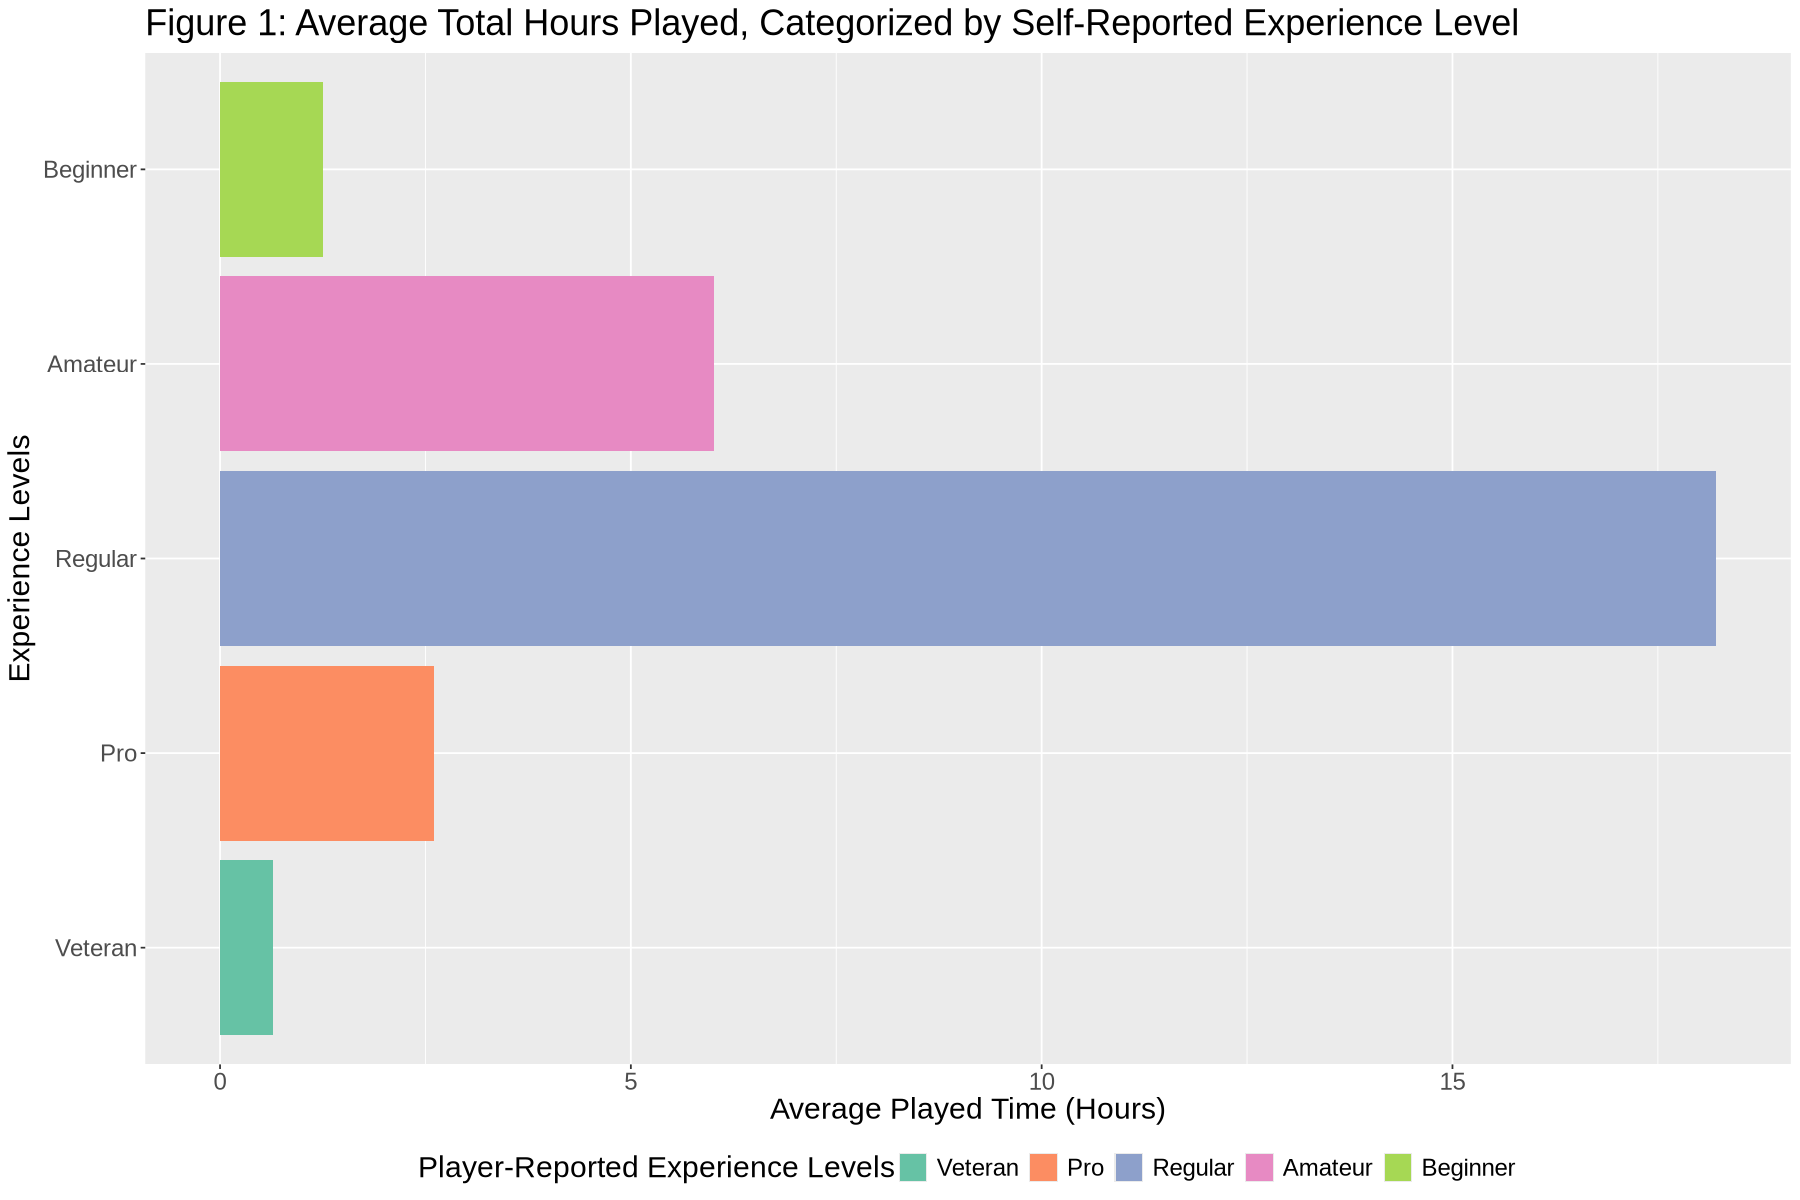

In [4]:
exp_total_hours <- cleaned_players |>
select(experience, played_hours) |>
mutate(experience = factor(experience, levels = c("Veteran", "Pro", "Regular", "Amateur", "Beginner"))) |>
group_by(experience) |>
summarize(total_played_hours = mean(played_hours))
exp_total_hours
#Created a tibble that calculates the average played hours, based on Experience classification

options(repr.plot.width = 15, repr.plot.height = 10)
exp_hours_plot <- exp_total_hours |>
ggplot(aes(x = total_played_hours, y = experience, fill = experience)) + 
geom_bar(stat = "identity") +
labs(x = "Average Played Time (Hours)", 
     y = "Experience Levels", 
     title = "Figure 1: Average Total Hours Played, Categorized by Self-Reported Experience Level",
     fill = "Player-Reported Experience Levels") +
scale_fill_brewer(palette = "Set2") +
theme(text = element_text(size = 18),
     legend.position = "bottom")
exp_hours_plot

In [5]:
hours_per_age <- cleaned_players |>
select(age, played_hours, experience) |>
arrange(by = desc(played_hours))

sample_hpa <- hours_per_age |>
head()
sample_hpa
#Produced a sample tibble of of age and played_hours from cleaned_players, all records of each player noted here

age,played_hours,experience
<dbl>,<dbl>,<chr>
17,223.1,Regular
20,218.1,Regular
19,178.2,Regular
16,150.0,Amateur
23,56.1,Amateur
17,53.9,Amateur


age,average_played_hours
<dbl>,<dbl>
16,50.03333
9,30.30000
19,25.65714
49,18.50000
20,15.82857


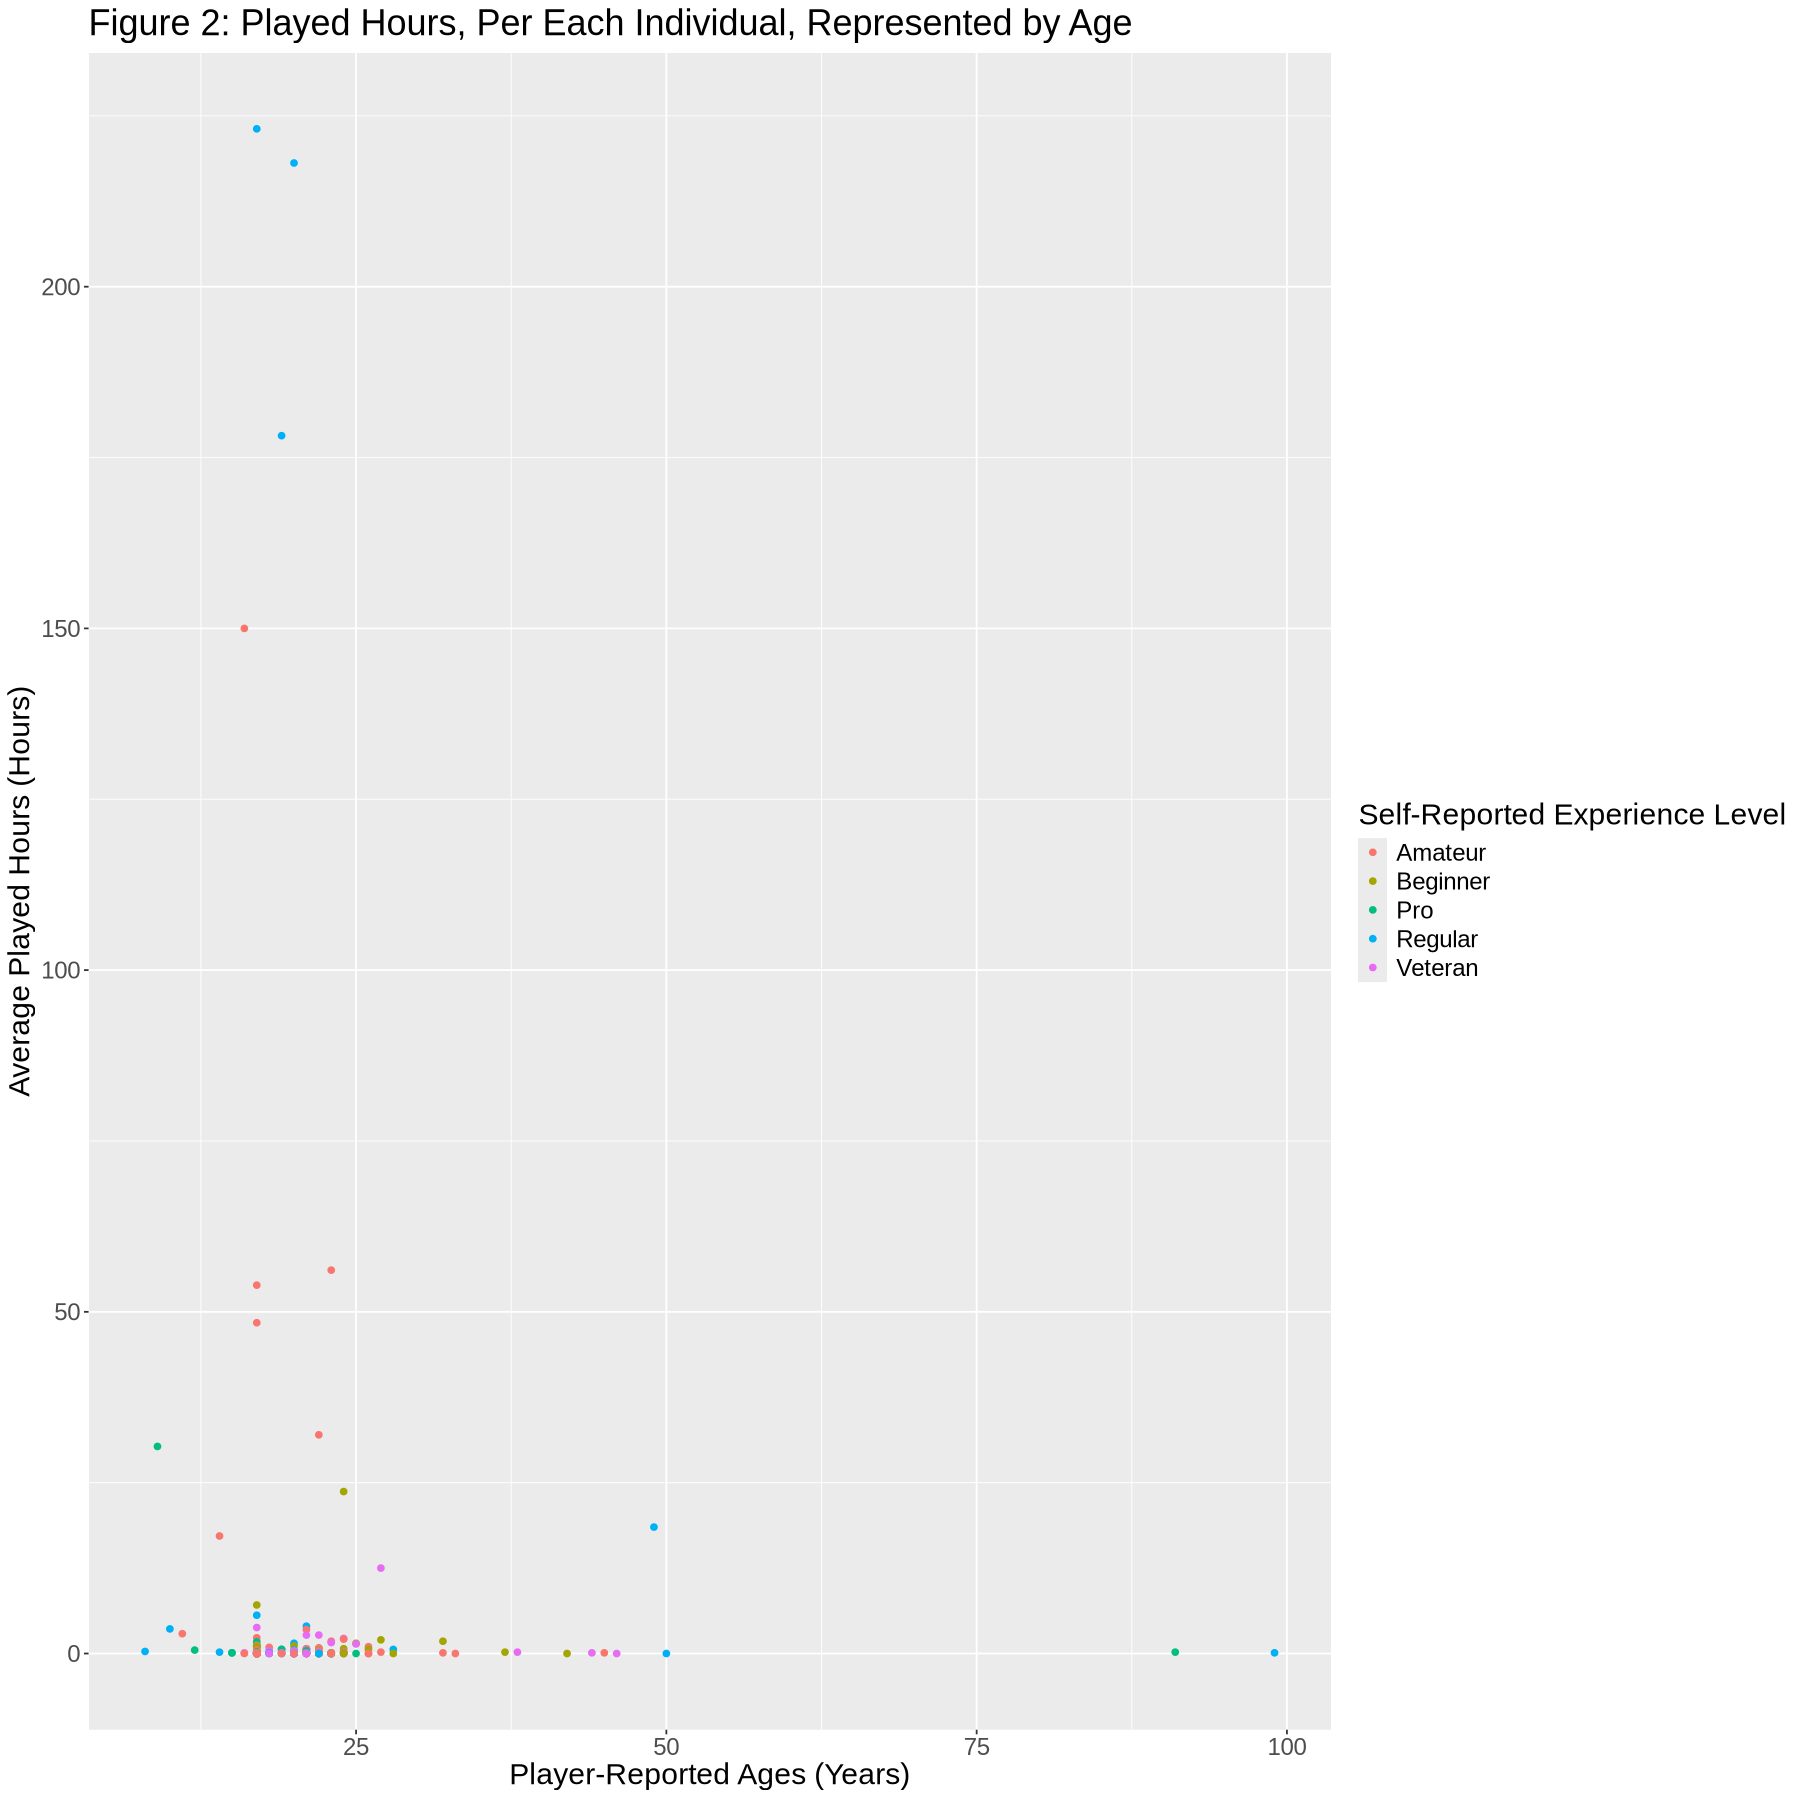

In [8]:
options(repr.plot.width = 15, repr.plot.height = 15)
new_age_plot <- hours_per_age |>
ggplot(aes(x = age, y = played_hours, color = experience)) +
geom_point() + 
labs(x = "Player-Reported Ages (Years)", 
     y = "Average Played Hours (Hours)", 
     title = "Figure 2: Played Hours, Per Each Individual, Represented by Age", 
    color = "Self-Reported Experience Level") +
scale_y_continuous() + 
theme(text = element_text(size = 18))
new_age_plot
#Plotted the played hours for EACH player -> Each "dot" corresponds to the players' individual age, separated by their Experience

highest_play_ages <- cleaned_players |>
group_by(age) |>
summarize(average_played_hours = mean(played_hours)) |>
arrange(by=desc(average_played_hours)) |>
slice(1:5)
#Produces a tibble that displays the top 5 player-reported ages that have the highest hours played

highest_play_ages
#Verifies finding through scatterplot: 16 y.o.'s play the most hours

[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

experience,played_hours,name,age,gender,experience_num
<fct>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
Pro,30.3,Morgan,9,Male,5
Veteran,3.8,Christian,17,Male,4
Veteran,0.0,Blake,17,Male,4
Amateur,0.7,Flora,21,Female,2
Regular,0.1,Kylie,21,Male,3
Amateur,0.0,Adrian,17,Female,2


Warning message:
“Removed 14 rows containing missing values or values outside the scale range
(`geom_point()`).”


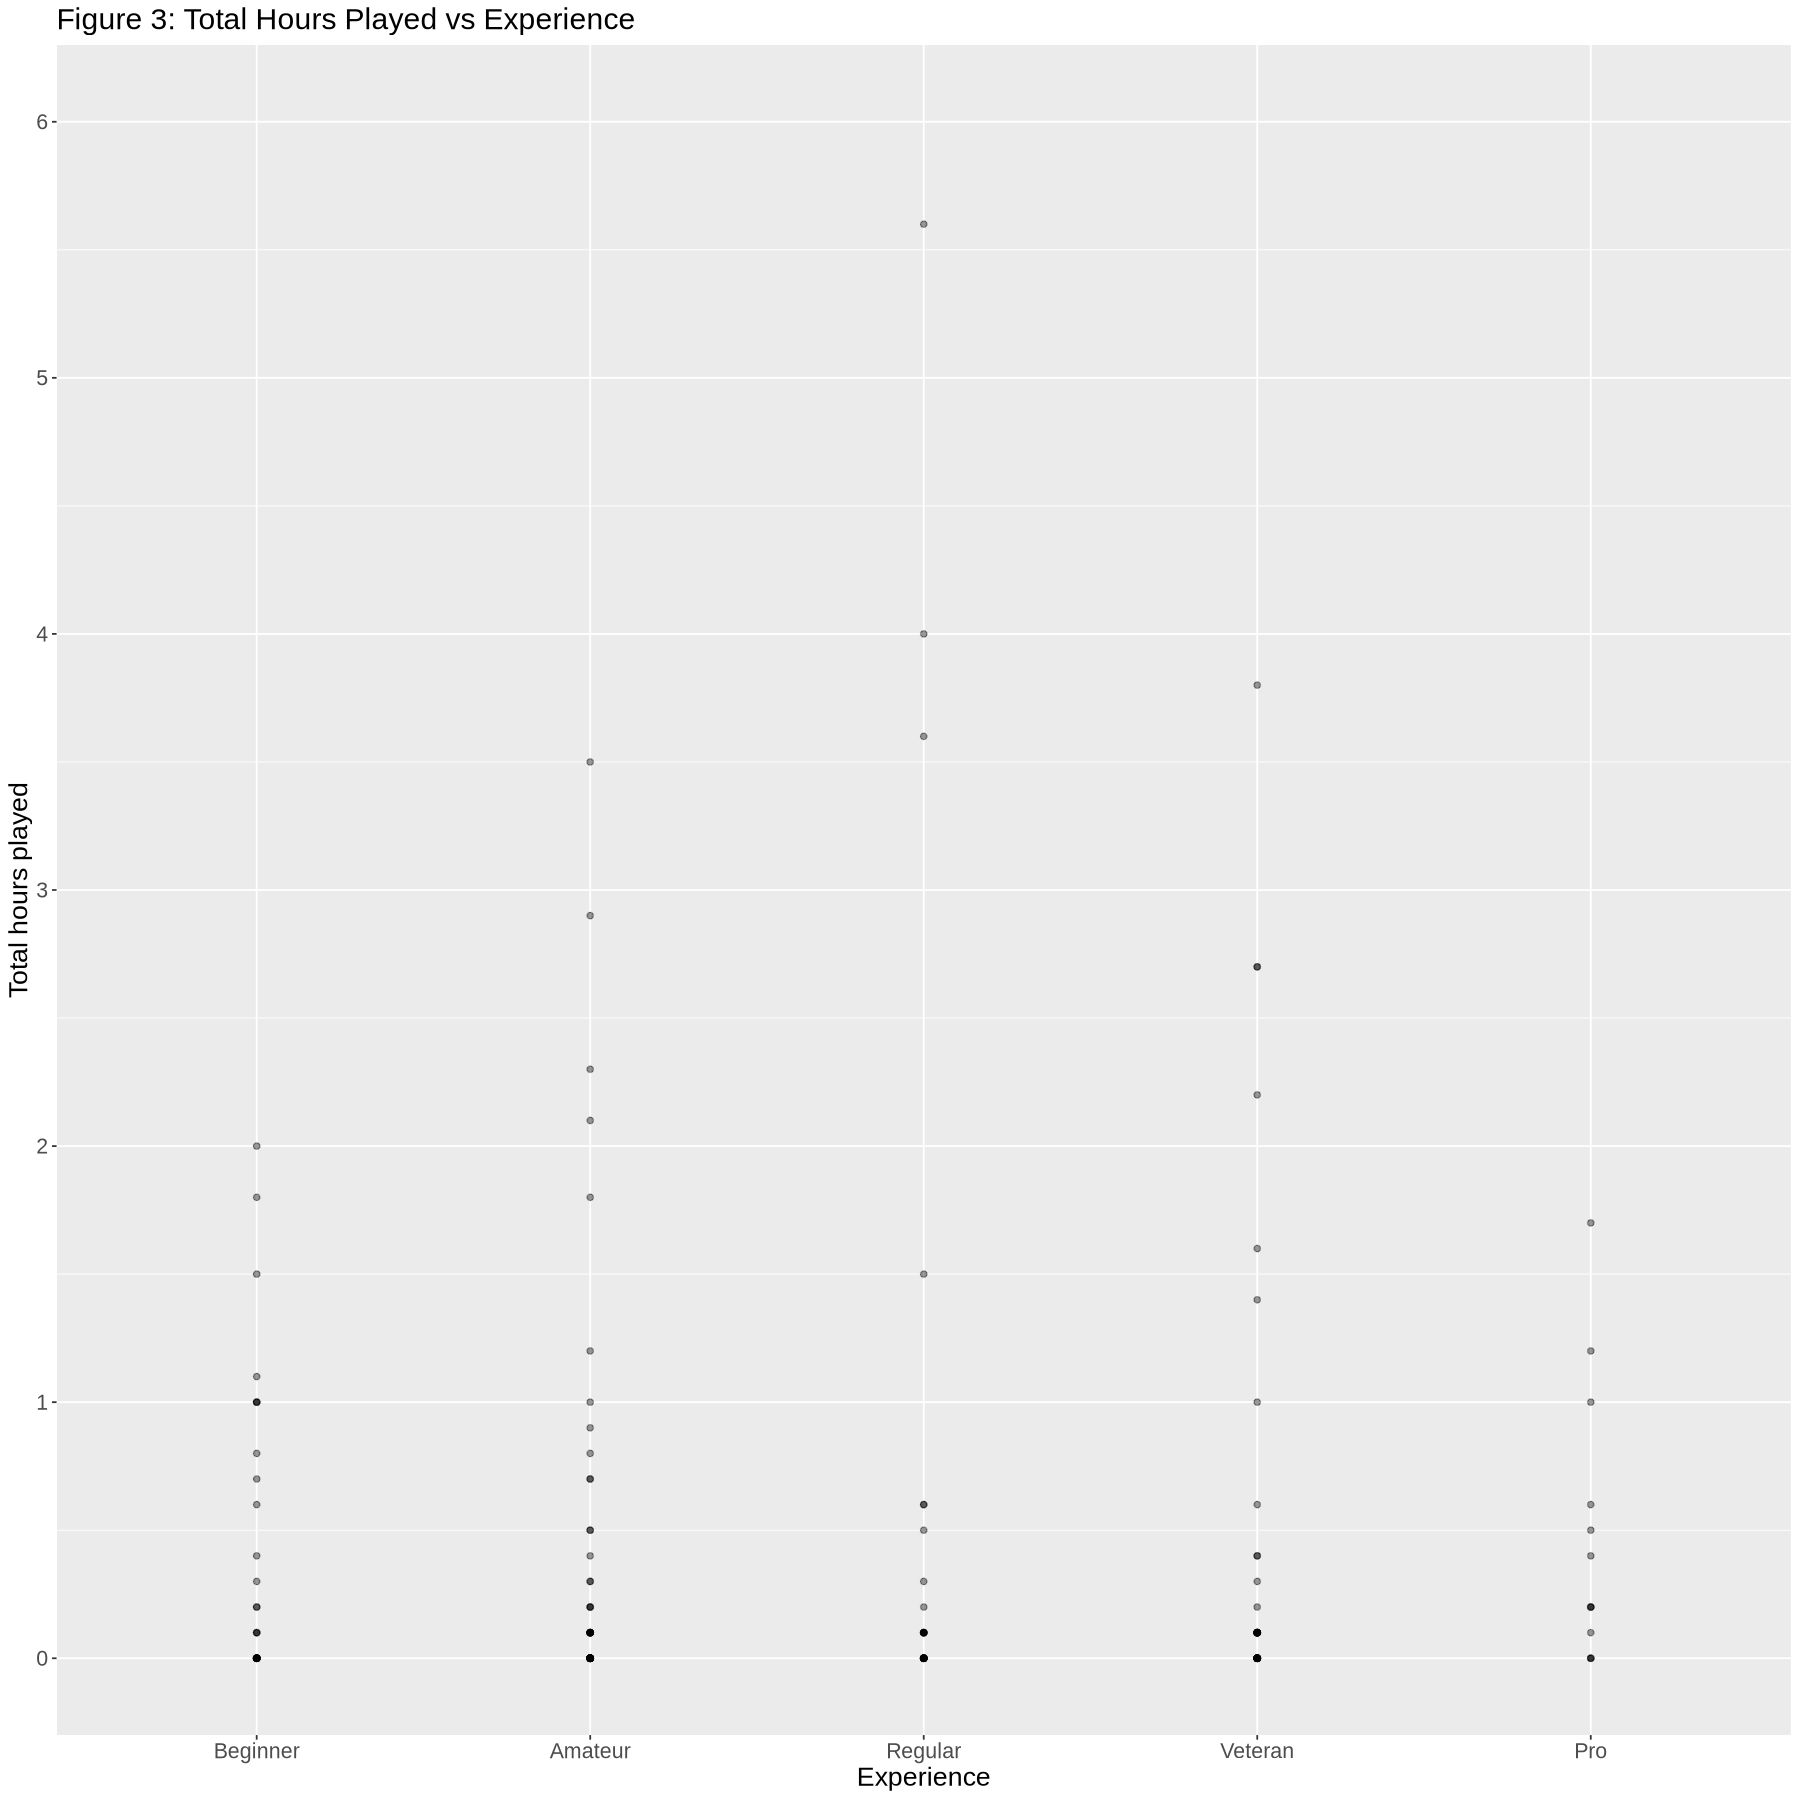

In [7]:
# Transform Experience INTO a factor - Generate factor variable for experience level -> Code taken from Jason's individual report
unique(cleaned_players$experience)
experience_levels <- c("Beginner", "Amateur", "Regular", "Veteran", "Pro")

transformed_players <- cleaned_players |>
    mutate(experience = factor(experience, levels = experience_levels), # factor variable           
          experience_num = case_when(experience == "Beginner" ~ 1,      # numeric variable for use in 
                                     experience == "Amateur" ~ 2,       #  regression in final report
                                     experience == "Regular" ~ 3,
                                     experience == "Veteran" ~ 4,
                                     experience == "Pro" ~ 5))

sample_transformed <- transformed_players |>
head()
sample_transformed

players_expnum_plot <- ggplot(transformed_players, aes(x = experience, y = played_hours)) +
        geom_point(alpha = 0.4) +
        labs(x = "Experience", y = "Total hours played", title = "Figure 3: Total Hours Played vs Experience") +
        scale_y_continuous(name = "Total hours played", limits = c(0, 6), breaks = seq(0, 6, by = 1)) +
        theme(text = element_text(size=16),
             plot.title = element_text(size=18))
players_expnum_plot
#Used Jason's plot from his report -> Having some difficulty with the interpretation
#Likely just a confirmation that Regular players still played the most outside of all Experience levels
#Also means that the research group should not be targetting "Pro" players